In [1]:
# Importación de pandas para traspasar el dataset de CSV a dataframe
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
df_Train_clean = pd.read_csv('df_Train_clean_v3.csv')
df_step_0 = df_Train_clean

In [2]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

df = df_step_0

# Separar características y objetivo
X = df.drop('Attrition_rate', axis=1)
y = df['Attrition_rate']

# Dividir en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear el modelo de Random Forest Regressor
rf = RandomForestRegressor(n_estimators=100, random_state=42)

# Entrenar el modelo
rf.fit(X_train, y_train)

# Hacer predicciones
y_pred = rf.predict(X_test)

# Evaluar el modelo
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)
print("Predicciones:", y_pred)

# Calcular las métricas de evaluación
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Guardar las métricas en un diccionario
metrics = {
    'Mean Squared Error (MSE)': mse,
    'Root Mean Squared Error (RMSE)': rmse,
     'Mean Absolute Error (MAE)': mae,
     'R^2': r2
}
print(metrics)

Mean Squared Error: 0.0036360947446235103
Predicciones: [0.05871435 0.10793965 0.07859872 ... 0.08486634 0.08708968 0.08528986]
{'Mean Squared Error (MSE)': 0.0036360947446235103, 'Root Mean Squared Error (RMSE)': 0.06030003934180732, 'Mean Absolute Error (MAE)': 0.049109449767203134, 'R^2': -0.22959654361254356}


C:\Users\smont\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [3]:
from sklearn.model_selection import GridSearchCV
# 26 minutes of execution process
# Definir los parámetros que quieres ajustar
# param_grid = {
#     'n_estimators': [100, 200, 300],
#     'max_depth': [None, 10, 20, 30],
#     'min_samples_split': [2, 5, 10],
#     'min_samples_leaf': [1, 2, 4]
# }

# # Crear un modelo de Random Forest
# rf = RandomForestRegressor(random_state=42)

# # Usar GridSearchCV para encontrar los mejores parámetros
# grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')
# grid_search.fit(X_train, y_train)

# # Ver los mejores parámetros encontrados
# print("Mejores parámetros:", grid_search.best_params_)

# # Entrenar el modelo con los mejores parámetros
# best_rf = grid_search.best_estimator_
# y_pred = best_rf.predict(X_test)

# # Evaluar el modelo
# from sklearn.metrics import mean_squared_error
# mse = mean_squared_error(y_test, y_pred)
# print("MSE del modelo ajustado:", mse)

# Mejores parámetros: {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 300}
# MSE del modelo ajustado: 0.035370652998662974

In [4]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

df = df_step_0

# Separar características y objetivo
X = df.drop('Attrition_rate', axis=1)
y = df['Attrition_rate']

# Dividir en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear el modelo de Random Forest Regressor
rf = RandomForestRegressor(
    n_estimators = 300, 
    random_state = 42,    
    max_depth = 10,
    min_samples_leaf = 4,
    min_samples_split = 2)

# Entrenar el modelo
rf.fit(X_train, y_train)

# Hacer predicciones
y_pred = rf.predict(X_test)

# Evaluar el modelo
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)
print("Predicciones:", y_pred)

# Calcular las métricas de evaluación
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Guardar las métricas en un diccionario
metrics = {
    'Mean Squared Error (MSE)': mse,
    'Root Mean Squared Error (RMSE)': rmse,
     'Mean Absolute Error (MAE)': mae,
     'R^2': r2
}
print(metrics)

Mean Squared Error: 0.0030348829245928333
Predicciones: [0.09533893 0.1091388  0.08850552 ... 0.09519618 0.10285982 0.10653193]
{'Mean Squared Error (MSE)': 0.0030348829245928333, 'Root Mean Squared Error (RMSE)': 0.05508977150608662, 'Mean Absolute Error (MAE)': 0.04514303322644338, 'R^2': -0.026288316569831993}


C:\Users\smont\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


El  modelo no es bueno en cuanto a R^2, por lo que es necesario revisar los datos de entrada.

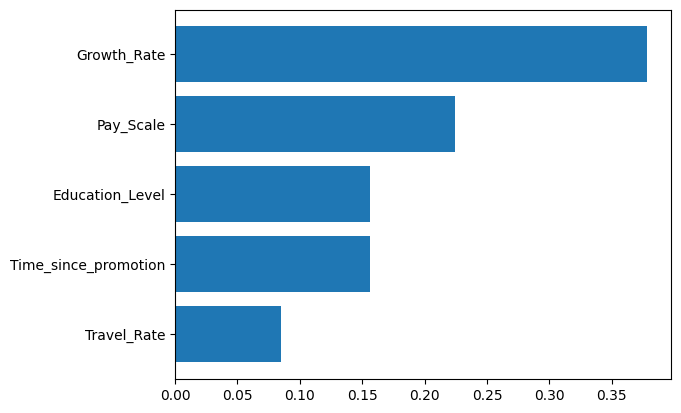

[0.08506429 0.15584457 0.15636347 0.22411477 0.3786129 ]
Index(['Travel_Rate', 'Time_since_promotion', 'Education_Level', 'Pay_Scale',
       'Growth_Rate'],
      dtype='object')


In [5]:
sort_idx = rf.feature_importances_.argsort()
plt.barh(X.columns[sort_idx],rf.feature_importances_[sort_idx])
plt.show();
print(rf.feature_importances_[sort_idx])
print(X.columns[sort_idx])

In [6]:
# Crear un DataFrame con los valores reales y predichos
resultados = pd.DataFrame({
    'Valor Real': y_test,
    'Valor Predicho': y_pred
})

# Mostrar las primeras filas del DataFrame de resultados
print(resultados.head())

      Valor Real  Valor Predicho
5010    0.077206        0.095339
1650    0.069774        0.109139
401     0.134936        0.088506
4222    0.164783        0.105572
1684    0.007734        0.094472


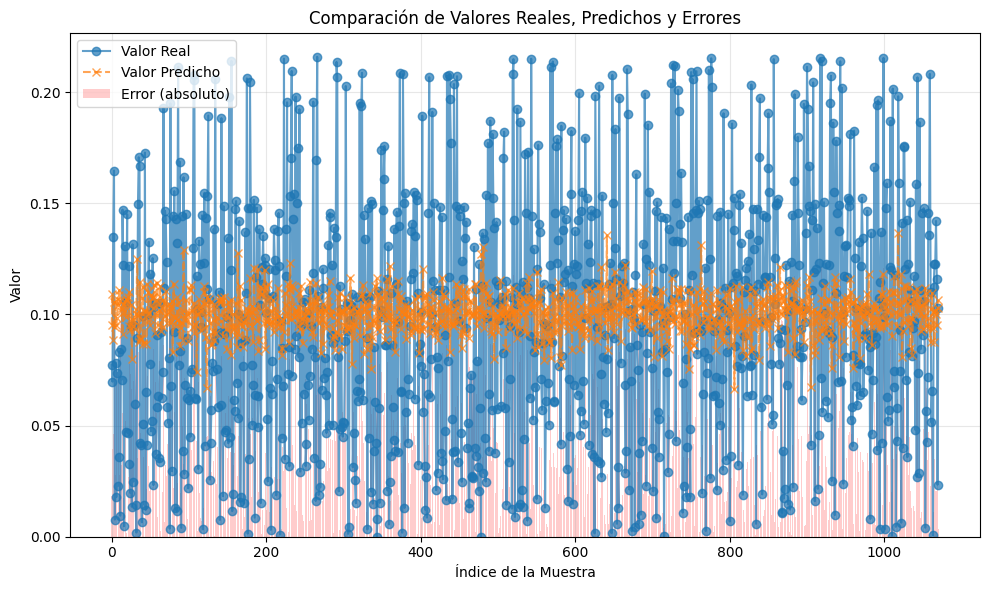

In [7]:
import matplotlib.pyplot as plt
import numpy as np

# Supongamos que tienes los valores reales y predichos
# y_test: valores reales
# y_pred: valores predichos

# Calcular los errores
errores = np.abs(y_test - y_pred)

# Crear la gráfica
plt.figure(figsize=(10, 6))
plt.plot(range(len(y_test)), y_test, label='Valor Real', marker='o', linestyle='-', alpha=0.7)
plt.plot(range(len(y_pred)), y_pred, label='Valor Predicho', marker='x', linestyle='--', alpha=0.7)
plt.bar(range(len(errores)), errores, color='red', alpha=0.2, label='Error (absoluto)')

# Etiquetas y leyenda
plt.title('Comparación de Valores Reales, Predichos y Errores')
plt.xlabel('Índice de la Muestra')
plt.ylabel('Valor')
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()

# Mostrar la gráfica
plt.show()